<a href="https://colab.research.google.com/github/FRashidy1403/Deep-learning-for-computer-vision/blob/main/detected_persian_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
model = keras.models.load_model('persian_digits.h5')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 60)             │         6,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,372 (106.93 KB)

 Trainable params: 27,370 (106.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
7


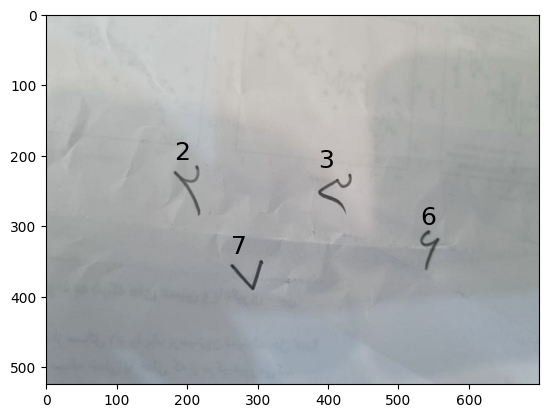

In [4]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

model = keras.models.load_model('persian_digits.h5')

# Read the input image (make sure it's a binary image)
image = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)
image_annotated = cv2.imread('persian-digits.jpg')

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

binary_image = 255-binary_image

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    if h>5 and w>5:
        # Crop the connected component using the bounding box
        cropped_img = binary_image[y:y+h, x:x+w]
        resized_img = cv2.resize(cropped_img, (10,10))
        reshaped_img = resized_img.reshape(1, 100)
        x_ = reshaped_img.astype('float32')/255 #normalization
        p = model.predict(x_)
        result= np.argmax(p)
        print(result)
        y = y-10 if y>10 else y+10
        plt.text(x,y,str(result), size=18)

# Display or save the cropped connected component
plt.imshow(image_annotated, 'gray')
plt.show()
